# Basic Table Extraction

PDFs often contain tables, and `natural-pdf` provides methods to extract their data, building on `pdfplumber`'s capabilities.

Let's extract the "Violations" table from our practice PDF.

In [1]:
#%pip install "natural-pdf[all]"

## pdfplumber-based extraction

In [2]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

tables = page.extract_tables()
tables[0]

CropBox missing from /Page, defaulting to MediaBox


[['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

## TATR-based extraction

When you do a TATR layout analysis, it uses a little magic to find borders and boundaries. A region analyzed by TATR will automatically use the `tatr` extraction method.

CropBox missing from /Page, defaulting to MediaBox


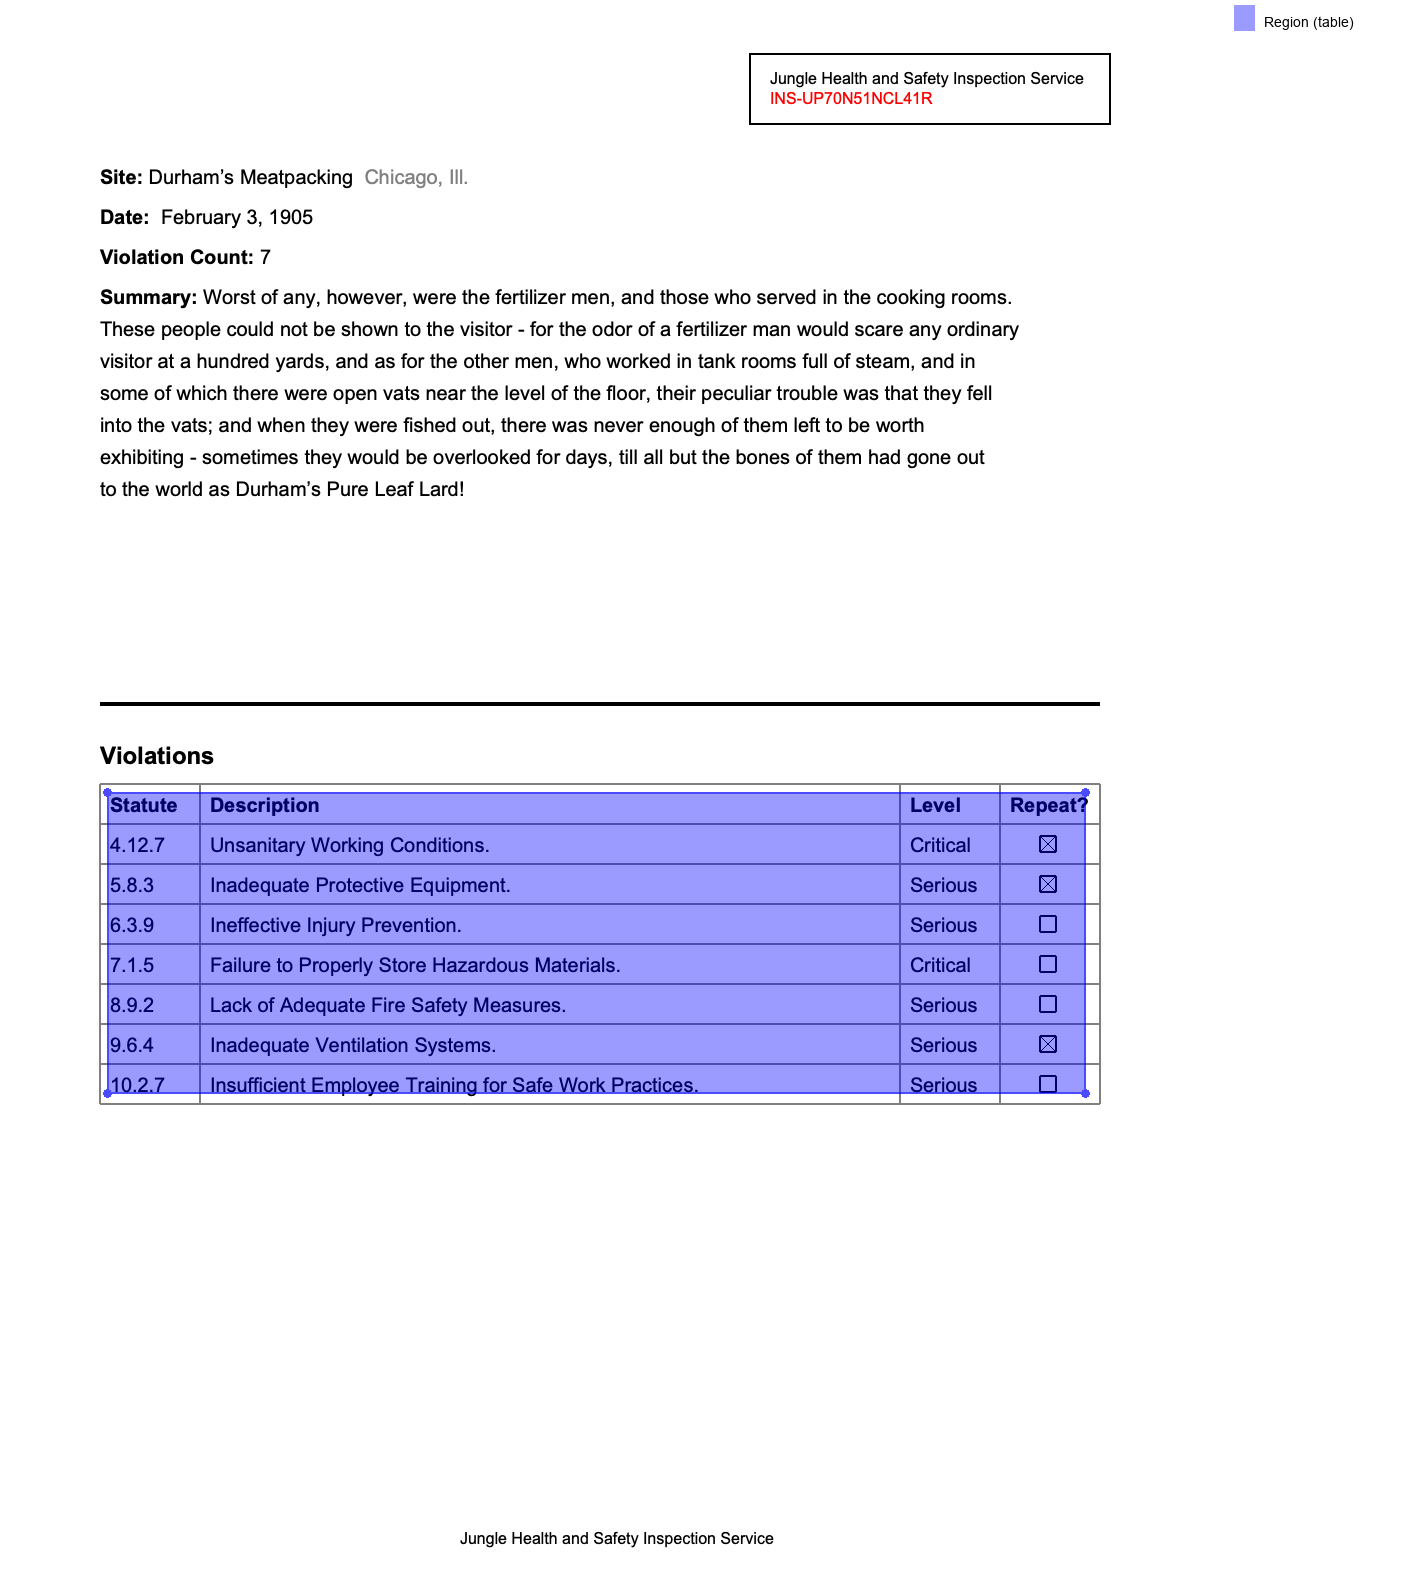

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

page.analyze_layout('tatr')
page.find('table').show()

In [4]:
page.find('table').extract_table()

[['Statute Description Level Repeat?'],
 ['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

## Paddle

In [5]:
from natural_pdf import PDF

# Load the PDF and get the page
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Analyze the layout using the default model
# This adds 'detected' Region objects to the page
# It returns an ElementCollection of the detected regions
page.analyze_layout('paddle')
detected_regions = page.find_all('region[source="detected"]')

CropBox missing from /Page, defaulting to MediaBox


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


/Users/soma/Development/natural-pdf/.venv/lib/python3.11/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Creating model: ('UVDoc', None)


Using official model (UVDoc), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocBlockLayout', None)


Using official model (PP-DocBlockLayout), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-DocLayout_plus-L', None)


Using official model (PP-DocLayout_plus-L), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_table_cls', None)


Using official model (PP-LCNet_x1_0_table_cls), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANeXt_wired', None)


Using official model (SLANeXt_wired), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('SLANet_plus', None)


Using official model (SLANet_plus), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wired_table_cell_det', None)


Using official model (RT-DETR-L_wired_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('RT-DETR-L_wireless_table_cell_det', None)


Using official model (RT-DETR-L_wireless_table_cell_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-Chart2Table', None)


Using official model (PP-Chart2Table), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/config.json


Loading weights file /Users/soma/.paddlex/official_models/PP-Chart2Table/model_state.pdparams


Loaded weights file from disk, setting weights to model.


All model checkpoint weights were used when initializing PPChart2TableInference.



All the weights of PPChart2TableInference were initialized from the model checkpoint at /Users/soma/.paddlex/official_models/PP-Chart2Table.
If your task is similar to the task the model of the checkpoint was trained on, you can already use PPChart2TableInference for predictions without further training.


Loading configuration file /Users/soma/.paddlex/official_models/PP-Chart2Table/generation_config.json


Creating model: ('PP-LCNet_x1_0_doc_ori', None)


Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-LCNet_x1_0_textline_ori', None)


Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_det', None)


Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


Creating model: ('PP-OCRv5_server_rec', None)


Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in /Users/soma/.paddlex/official_models.


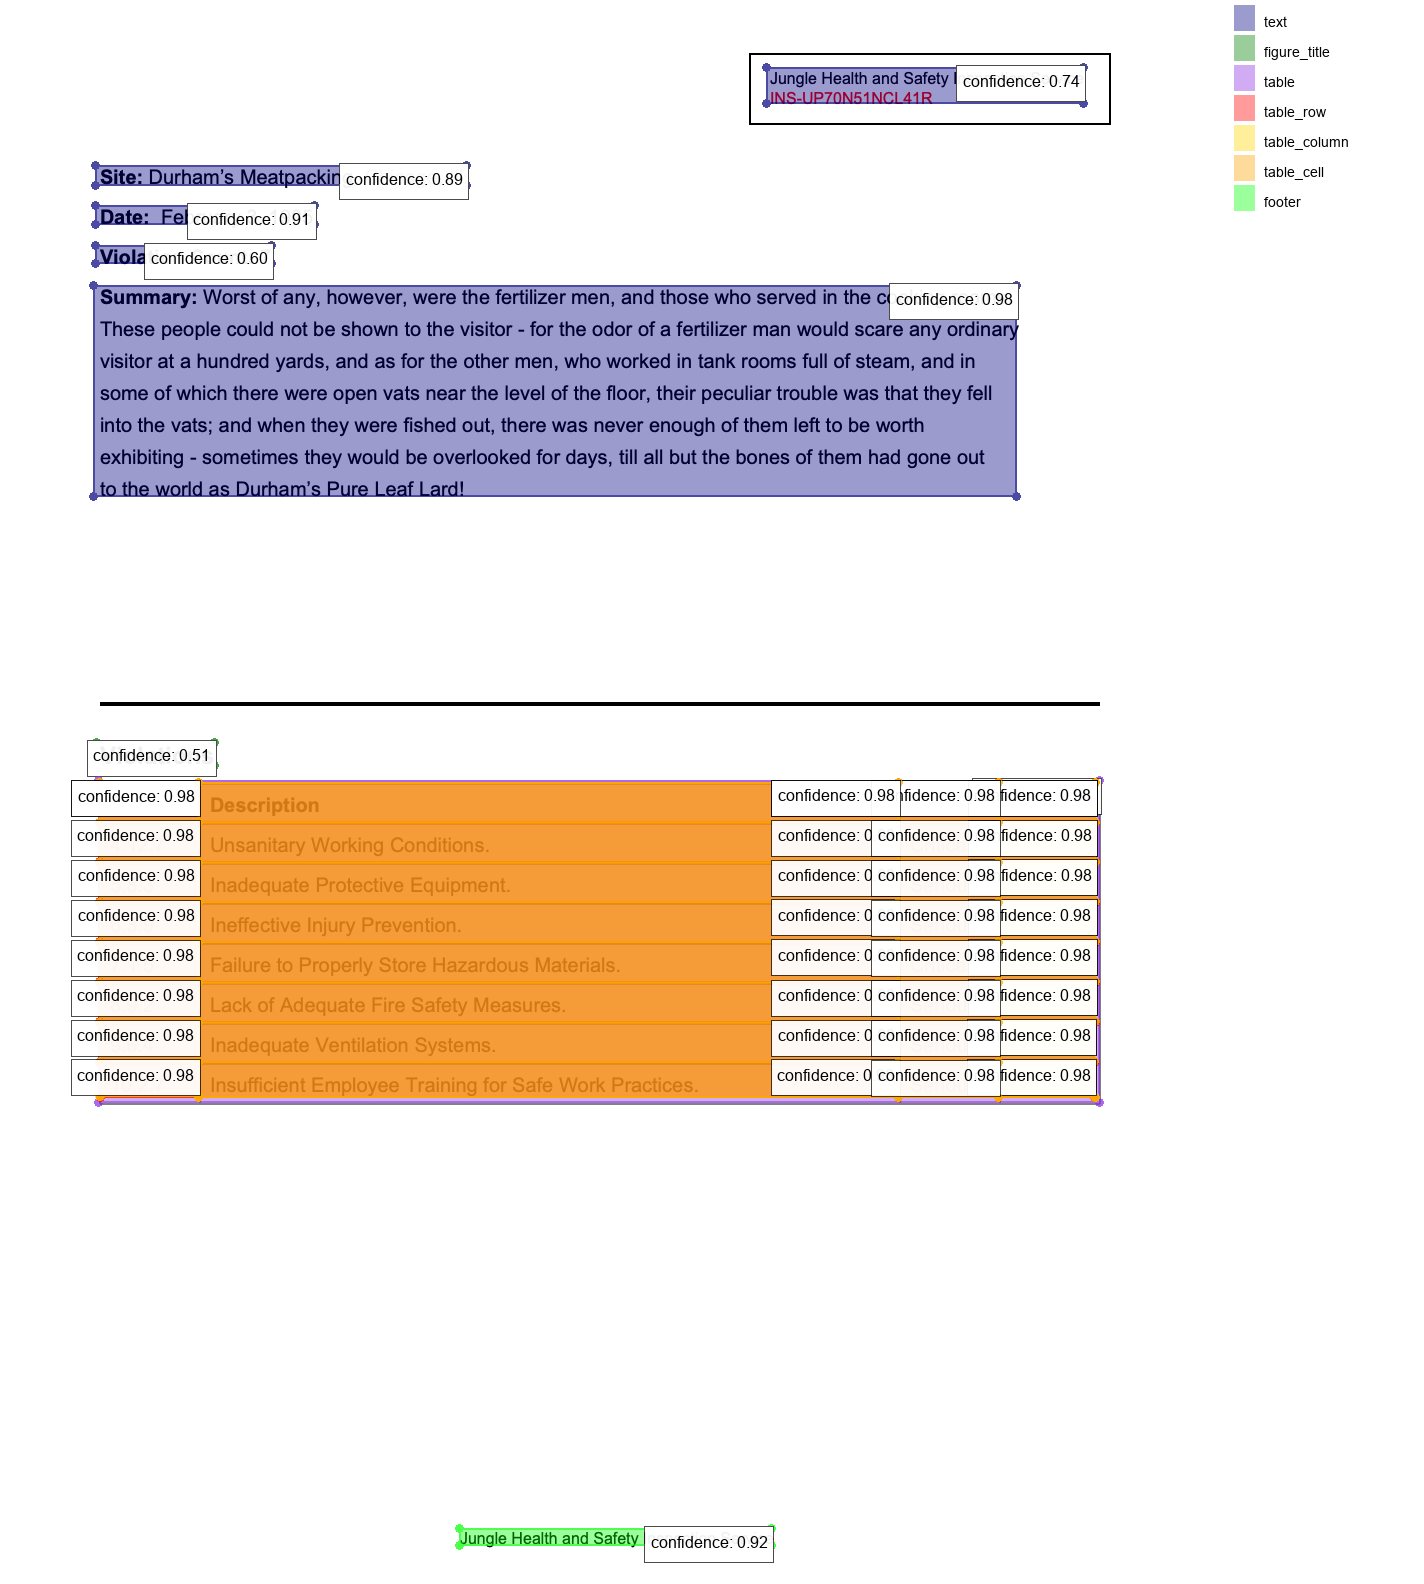

In [6]:
# Visualize all detected regions, using default colors based on type
detected_regions.show(group_by='type', include_attrs=['confidence'])